## Package imports, load_train data, basic info

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

# training file input
train_path = '/Users/shalakathombare/Prepvector course/archive/train.csv'
df = pd.read_csv(train_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [2]:
## Compute the distance between two co-ordinates
def haversine(lon1, lat1, lon2, lat2):
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    meters = R * c  
    km_d = meters / 1000.0  
    # meters, km = round(meters, 3), round(km_d, 3)‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍
    return km_d

In [3]:
## Input variables
## Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, 
## Numerical variables - Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, 
## Derived variables - Distance

## Modify Column dtypes

In [4]:
# df = df[df.Delivery_person_Age != 'NaN ']
df['Delivery_person_ID'] = df['Delivery_person_ID'].astype(str)
df['ID'] = df['ID'].astype(str)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
## Remove (min) from time_taken
df['target'] = df['Time_taken(min)'].str.replace('(min)', '', regex=False).astype(int)
                   
## Remove Null Time_Orderd
df = df[df.Time_Orderd != 'NaN ']
df = df[df.Time_Order_picked != 'NaN ']

In [5]:
## Get categorical and numerical columns
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.drop(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_taken(min)'], axis=1, inplace=True)
columns_to_encode = ['Delivery_person_Age', 'Weatherconditions', 'Road_traffic_density', 
                     'Vehicle_condition', 'Type_of_vehicle', 'Type_of_order', 'multiple_deliveries',
                    'Festival', 'City']

numeric_data.shape, categorical_data.shape

((43862, 7), (43862, 10))

## Data distribution insights

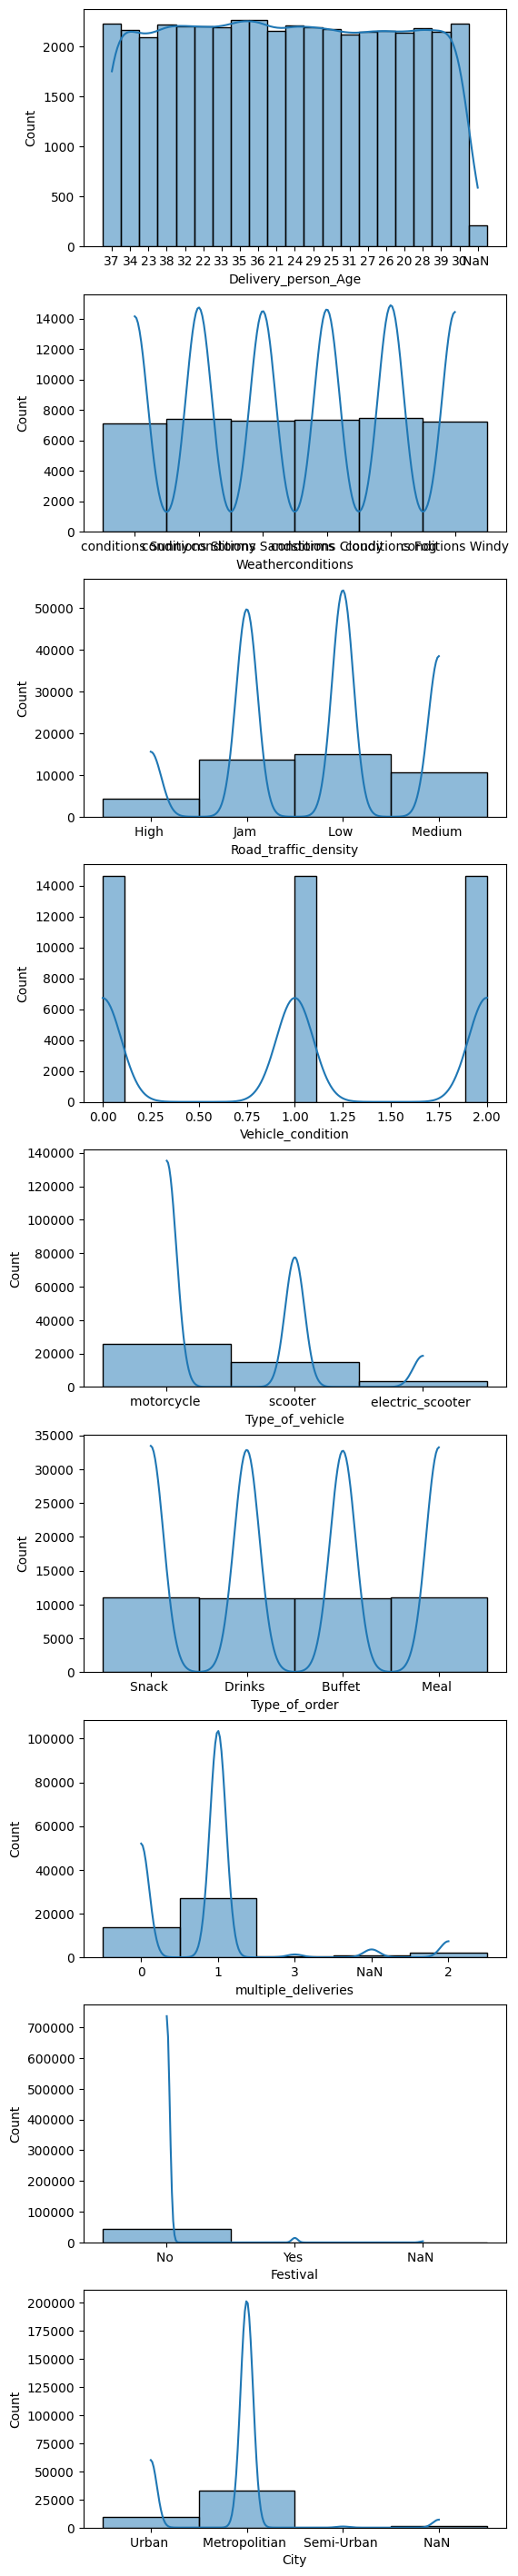

In [5]:
### Deliverer's age, time_orderd, weather conditions, road_traffic_density, type_of_order, type_of_vehicle
### all the variables seem pretty uniformly distributed
### Drivers are between ages of 20-39
### Most of the deliveries are made over Motorcycle & scooter, very sparse on electric scooter
### Majority orders are in Metropolitan areas - this variable probably does not make sense to use as a predictor

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_encode), ncols=1, figsize=(6, len(columns_to_encode) * 4))

# Plot histograms for each column
for i, col in enumerate(columns_to_encode):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    
plt.show()

## Encode categorical columns, Standardize Numerical ones

In [6]:
#df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False, dtype=int)

df['order_day']=pd.to_datetime(df.Order_Date).dt.weekday
df['order_month']=pd.to_datetime(df.Order_Date).dt.month
df['order_yr']=pd.to_datetime(df.Order_Date).dt.year

def normalize_time_values(df, col):
    return (pd.to_datetime(df[col]).dt.hour * 3600 + pd.to_datetime(df[col]).dt.minute * 60 + \
                         pd.to_datetime(df[col]).dt.second) / 86400

# ## Get order time for time of the day value
df['Time_Orderd_n'] = normalize_time_values(df, 'Time_Orderd')
df['Time_Order_picked_n'] = normalize_time_values(df, 'Time_Order_picked')

## Compute distance
df['distance'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], 
                                                        row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)
## Standardize distance
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaler to the 'distance' feature (assuming it's a 1D column)
df['distance_standardized'] = scaler.fit_transform(df[['distance']])


# Convert the 'feature' column to its natural logarithm (log base e)
df['distance_log'] = np.log(df['distance'])

# Replace null values with the mean
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)
df.loc[df['Delivery_person_Age'] == 'NaN ', 'Delivery_person_Age'] = None
df.Delivery_person_Age = df.Delivery_person_Age.astype(float)
df.Delivery_person_Age.fillna(df.Delivery_person_Age.mean(), inplace=True)
df['Driver_age_standardized'] = scaler.fit_transform(df[['Delivery_person_Age']])

/var/folders/cy/09ck99b97wn5rfm5lp9zqm940000gn/T/ipykernel_69953/1796208385.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_day']=pd.to_datetime(df.Order_Date).dt.weekday
/var/folders/cy/09ck99b97wn5rfm5lp9zqm940000gn/T/ipykernel_69953/1796208385.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_month']=pd.to_datetime(df.Order_Date).dt.month
/var/folders/cy/09ck99b97wn5rfm5lp9zqm940000gn/T/ipykernel_69953/1796208385.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_yr']=pd.to_datetime(df.Order_Date).dt.year
/var/folders/cy/09ck99b97wn5rfm5lp9zqm940000gn/T/ipykernel_69953/1796208385.py:8: UserWarning: Cou

In [8]:
## Questions to answer
## 1. How is the output going to look like ? -- Let's treat this as regression problem with target variable - time taken 
## 2. So, given a row - model should predict time taken for delivery 
## 3. Is there seasonality in the data ? How are some variables influencing the target? 
## 4. How many drivers are there ? Is there a relationship between food ordered and time taken ? -- Snacks take less time to deliver etc? 
## 5. How does road_traffic_density affect the delivery time ? 
## 6. Are drivers with better rating helping deliver faster ? -- 
## 7. What are some factors causing slower deliveries ? -- 

## Study Distribution of Categorical variables

## Target Minutes to delivery

In [7]:
## Time taken in minutes varies between 10-54 minutes.
## Which means the prediction will have to be very close to accurate in seconds
df.target.describe()

count    43862.000000
mean        26.293831
std          9.373765
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: target, dtype: float64

In [8]:
df.target.unique(), df.Time_Orderd_n.nunique()

(array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
        47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
        42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51]),
 176)

## Inspect Correlations

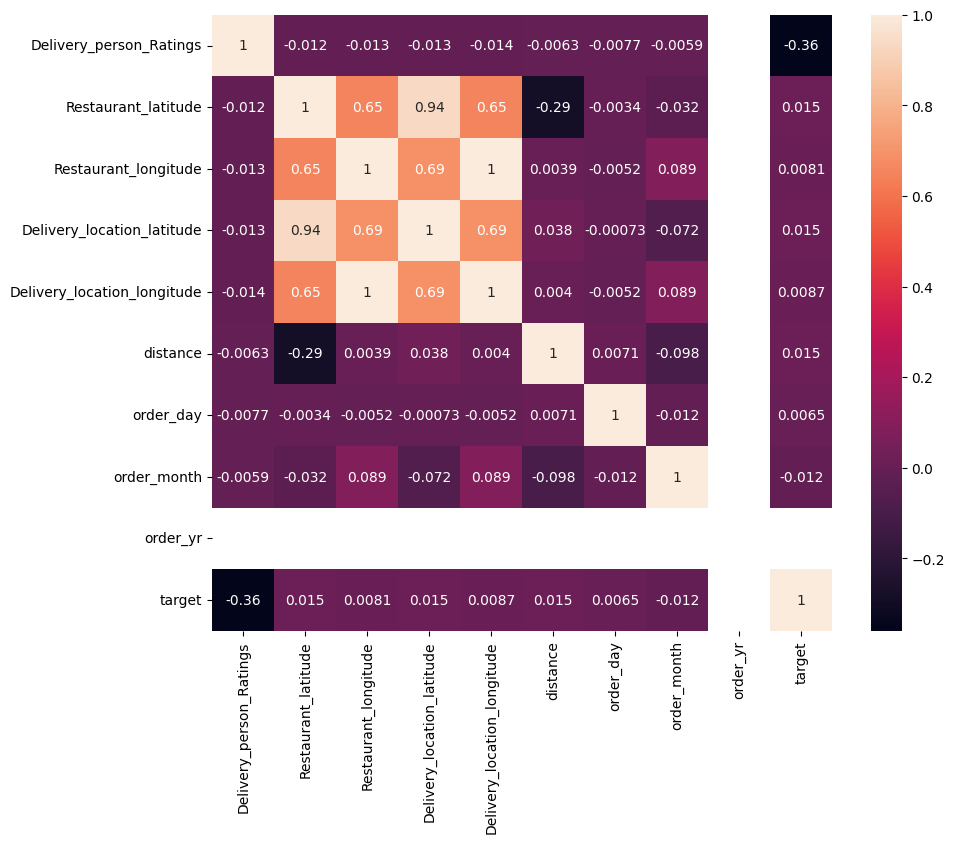

In [9]:
## Distance and Target have a weak positive correlation - 0.015 indicating lower the distance less the minutes to deliver
## Delivery person's ratings & Target have heavily negative corr - -0.36 indicates - Higher the person's ratings, faster the delivery
## Restaurant latitude has a strong negative corr w Distance - This prob means that there's certain restaurants that are more central, 
                                                               ## thus making all delivery locations closer to them
                                                               ## Thus, we should use this lattitude as a feature despite of using distance
## Distance and Order Month have a weak negative corr - -0.

fig, ax = plt.subplots(figsize=(10,8))
correlation_matrix = df[['Delivery_person_Ratings', 'Restaurant_latitude', 
 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'distance',
 'order_day', 'order_month', 'order_yr','target']].corr()

# correlation_matrix = df[['Delivery_person_Age_20', 'Delivery_person_Age_21',
#    'Delivery_person_Age_22', 'Delivery_person_Age_23',
#    'Delivery_person_Age_24', 'Delivery_person_Age_25',
#    'Delivery_person_Age_26', 'Delivery_person_Age_27',
#    'Delivery_person_Age_28', 'Delivery_person_Age_29',
#    'Delivery_person_Age_30', 'Delivery_person_Age_31',
#    'Delivery_person_Age_32', 'Delivery_person_Age_33',
#    'Delivery_person_Age_34', 'Delivery_person_Age_35',
#    'Delivery_person_Age_36', 'Delivery_person_Age_37',
#    'Delivery_person_Age_38', 'Delivery_person_Age_39', 'distance','target']].corr()

ax = sns.heatmap(correlation_matrix, annot=True)
plt.show()

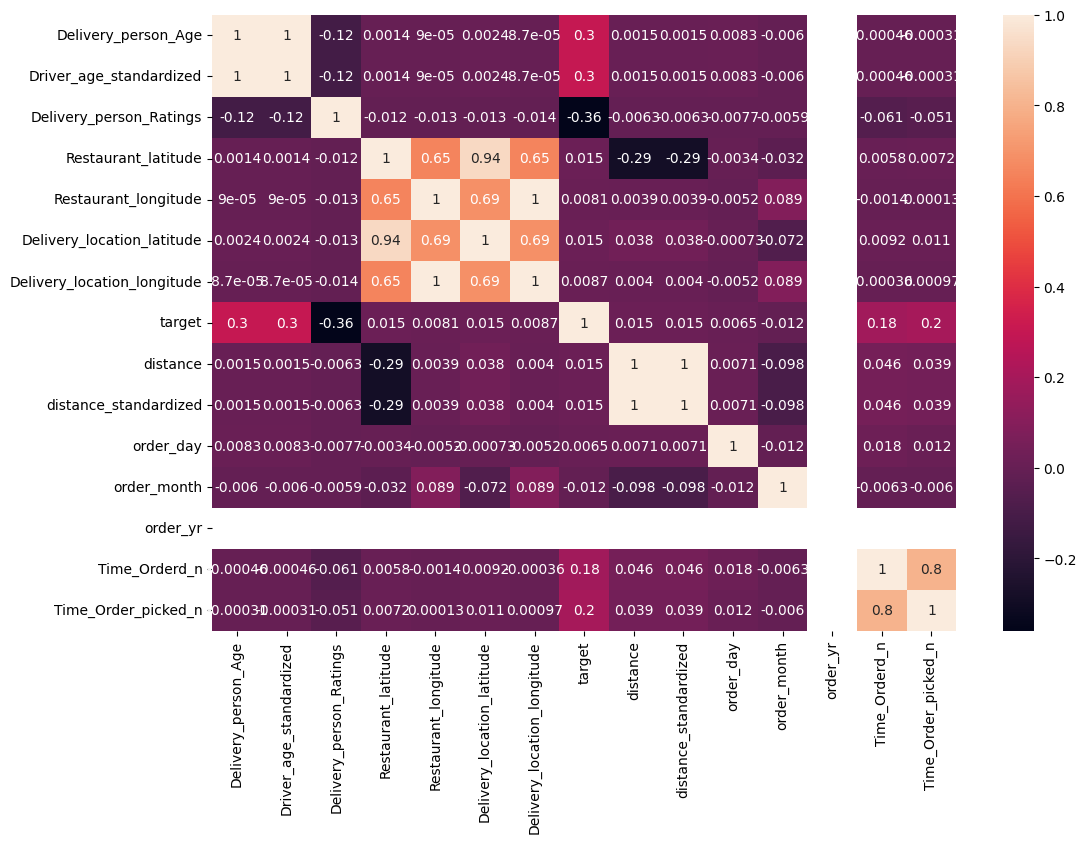

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
correlation_matrix = df[['Delivery_person_Age','Driver_age_standardized',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'target', 'distance',
       'distance_standardized', 'order_day', 'order_month', 'order_yr', 'Time_Orderd_n',
       'Time_Order_picked_n']].corr()

ax = sns.heatmap(correlation_matrix, annot=True)
plt.show()

/var/folders/cy/09ck99b97wn5rfm5lp9zqm940000gn/T/ipykernel_6595/1803295901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set1')


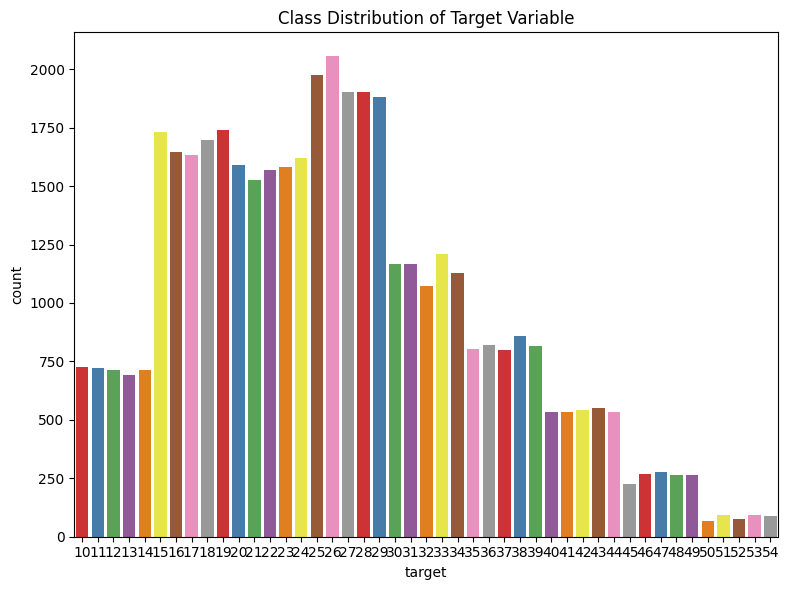

In [12]:

if 'target' in df.columns:  # Replace 'target' with your actual target column name
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='target', palette='Set1')
    plt.title("Class Distribution of Target Variable")
    plt.tight_layout()
    plt.show()

In [7]:
dd = df.copy()

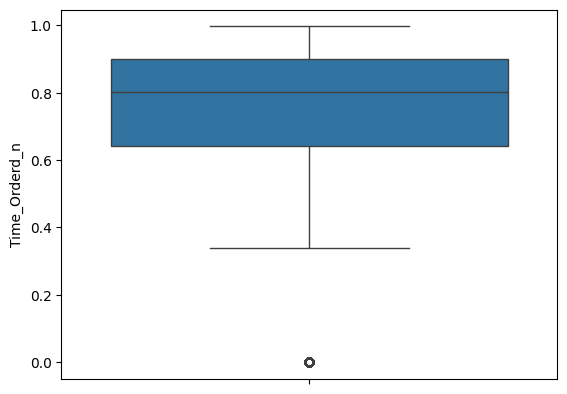

125      0.0
608      0.0
705      0.0
834      0.0
895      0.0
        ... 
45085    0.0
45104    0.0
45172    0.0
45496    0.0
45531    0.0
Name: Time_Orderd_n, Length: 430, dtype: float64


In [8]:
sns.boxplot(dd['Time_Orderd_n'])
plt.show()

from scipy.stats import zscore

# Calculate the Z-scores
z_scores = zscore(dd['Time_Orderd_n'])

# Identify outliers: Absolute Z-score greater than 3
outliers_time_orderd = dd[abs(z_scores) > 3]
print(outliers_time_orderd['Time_Orderd_n'])

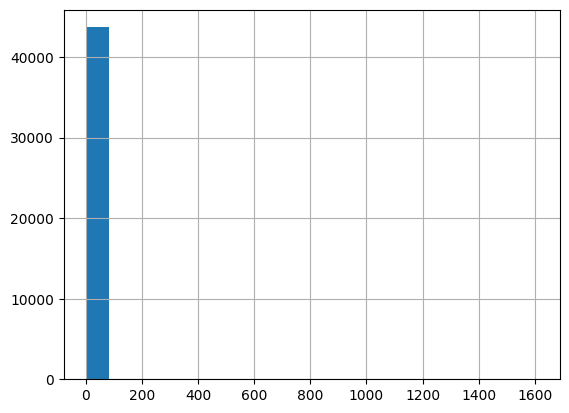

92       1203.534474
283      1208.091961
1091      956.052680
1783     1094.130887
2101      921.992069
            ...     
43860     949.382297
44051     922.037335
44640     524.654968
44933    1096.343433
45182     955.124574
Name: distance, Length: 129, dtype: float64


In [9]:
# sns.boxplot(df['distance'])
# plt.show()
df['distance'].hist(bins=20)
plt.show()

from scipy.stats import zscore

# Calculate the Z-scores
z_scores = zscore(df['distance'])

# Identify outliers: Absolute Z-score greater than 3
outliers = df[abs(z_scores) > 3]
print(outliers['distance'])

In [10]:
## remove outliers in distance
dd = dd[~dd.distance.isin(outliers['distance'].unique())]
dd = dd[~dd.Time_Orderd_n.isin(outliers_time_orderd['Time_Orderd_n'].unique())]

In [11]:
## Questions from the data
## 1. How many data points ? -- (45593, 20)
## 2. How many delivery persons we have ? How many weatherConditions ?  -- 
## 3. Are there any nulls ? -- No nulls in any column
## 4. How ma

In [12]:
## ((45593, 20), 1320, 23)
## df.shape, df.Delivery_person_ID.nunique(), df.Delivery_person_Age.nunique()

In [12]:
dd['Delivery_person_Ratings_log'] = np.log(dd['Delivery_person_Ratings'])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [25]:
def train_linear_regression(data, feature_columns, target):
    
    # Split data into features (X) and target (y)
    X = dd[feature_columns]  # Features
    y = dd[target]           # Target
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return y_pred, X_train, X_test, y_train, y_test 

def train_ols(X_train, X_test, y_train):
    # Add a constant (intercept) term to the features
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)
    
    # Fit the model using statsmodels
    model_stats = sm.OLS(y_train, X_train_const).fit()
    
    # Print the summary statistics
    print(model_stats.summary())

### First Pass

In [26]:
## After initial look, standardizing numerical variables, removing outliers from distance, time_orderd (all orders orderd at 12 am - 0 hour), 
## We see that there's heavy correlations with target -- distance, Time_Order_picked_n, Time_Orderd_n, Delivery_person_ratings, 

In [27]:
## Let's try out linear regression with just these four variables before adding categorical variables.

In [28]:
feature_columns = ['Delivery_person_Ratings', 'Time_Order_picked_n', 'Time_Orderd_n', 'distance_log']
target = ['target']
y_pred, X_train, X_test, y_train, y_test  = train_linear_regression(dd, feature_columns, target)

Mean Squared Error: 69.2558045863959
R-squared: 0.22751523526237827


In [190]:
feature_columns = ['Weatherconditions_conditions Cloudy',
       'Weatherconditions_conditions Fog',
       'Weatherconditions_conditions Sandstorms',
       'Weatherconditions_conditions Stormy',
       'Weatherconditions_conditions Sunny',
       'Weatherconditions_conditions Windy', 'Road_traffic_density_High ',
       'Road_traffic_density_Jam ', 'Road_traffic_density_Low ',
       'Road_traffic_density_Medium ',
'Delivery_person_Ratings', 'Time_Order_picked_n', 'distance_log',]
y_pred, X_train, X_test, y_train, y_test  = train_linear_regression(dd, feature_columns, target)

train_ols(X_train, X_test, y_train)

Mean Squared Error: 53.60079511937243
R-squared: 0.38698417279429465
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1709.
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:35:57   Log-Likelihood:            -1.1755e+05
No. Observations:               34472   AIC:                         2.351e+05
Df Residuals:                   34458   BIC:                         2.352e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [116]:
dd['Road_traffic_density_Jam '].describe(), dd['Road_traffic_density_High '].describe(), dd['Road_traffic_density_Medium '].describe()

(count    43091.000000
 mean         0.317537
 std          0.465524
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          1.000000
 max          1.000000
 Name: Road_traffic_density_Jam , dtype: float64,
 count    43091.000000
 mean         0.099371
 std          0.299163
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          1.000000
 Name: Road_traffic_density_High , dtype: float64,
 count    43091.000000
 mean         0.246084
 std          0.430733
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          1.000000
 Name: Road_traffic_density_Medium , dtype: float64)

In [191]:
feature_columns = ['Weatherconditions_conditions Cloudy',
       'Weatherconditions_conditions Fog',
       'Weatherconditions_conditions Sandstorms',
       'Weatherconditions_conditions Stormy',
       'Weatherconditions_conditions Sunny',
       'Weatherconditions_conditions Windy', 
       'Road_traffic_density_High ',
       'Road_traffic_density_Jam ', 
        'Road_traffic_density_Low ',
       'Road_traffic_density_Medium ',
'Delivery_person_Ratings', 'Time_Order_picked_n', 'distance_log',
        'Festival_Yes ', 'City_Metropolitian ',
                  ]
y_pred, X_train, X_test, y_train, y_test  = train_linear_regression(dd, feature_columns, target)

train_ols(X_train, X_test, y_train)


 # Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# More detailed classification report
print(classification_report(y_test, y_pred))

Mean Squared Error: 48.73784379882788
R-squared: 0.44260025311149265
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1838.
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:36:16   Log-Likelihood:            -1.1600e+05
No. Observations:               34472   AIC:                         2.320e+05
Df Residuals:                   34456   BIC:                         2.322e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [192]:
feature_columns = [
'Weatherconditions_conditions Cloudy',
       'Weatherconditions_conditions Fog',
       'Weatherconditions_conditions Sandstorms',
       'Weatherconditions_conditions Stormy',
       'Weatherconditions_conditions Sunny',
       'Weatherconditions_conditions Windy', 
       'Road_traffic_density_High ',
       'Road_traffic_density_Jam ', 
        'Road_traffic_density_Low ',
       'Road_traffic_density_Medium ',
'Delivery_person_Ratings', 'Time_Order_picked_n', 'distance',
        'Festival_Yes ', 'City_Metropolitian ',
        'is_rating_higher']
y_pred, X_train, X_test, y_train, y_test  = train_linear_regression(dd, feature_columns, target)
# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# # More detailed classification report
# print(classification_report(y_test, y_pred))

train_ols(X_train, X_test, y_train)

Mean Squared Error: 48.64723233970632
R-squared: 0.4436365485329321
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     1707.
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:36:24   Log-Likelihood:            -1.1607e+05
No. Observations:               34472   AIC:                         2.322e+05
Df Residuals:                   34455   BIC:                         2.323e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [14]:
pd.set_option('display.max_columns', None)


In [155]:
dd['Road_traffic_density_High '].value_counts()

Road_traffic_density_High 
0    38809
1     4282
Name: count, dtype: int64

In [139]:
dd['is_rating_higher'] = 0

In [144]:
dd.loc[dd['Delivery_person_Ratings'] > 4.5, 'is_rating_higher'] = 1

In [145]:
dd.is_rating_higher.unique()

array([1, 0])

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [174]:
def train_random_forest(X_train, y_train, y_test):
    # Create the RandomForestClassifier model
    rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # More detailed classification report
    print(classification_report(y_test, y_pred))

    # For regression, if y_test and y_pred are continuous:
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    
    # print(f"MSE: {mse:.4f}")
    # print(f"R²: {r2:.4f}")

    # Feature importance
    importances = rf_model.feature_importances_
    
    # Create a DataFrame to display feature importance
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values(by='importance', ascending=False)
    
    print(feature_importance_df)


In [194]:
feature_columns = [ 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
        'Delivery_person_Age_20', 'Delivery_person_Age_21',
       'Delivery_person_Age_22', 'Delivery_person_Age_23',
       'Delivery_person_Age_24', 'Delivery_person_Age_25',
       'Delivery_person_Age_26', 'Delivery_person_Age_27',
       'Delivery_person_Age_28', 'Delivery_person_Age_29',
       'Delivery_person_Age_30', 'Delivery_person_Age_31',
       'Delivery_person_Age_32', 'Delivery_person_Age_33',
       'Delivery_person_Age_34', 'Delivery_person_Age_35',
       'Delivery_person_Age_36', 'Delivery_person_Age_37',
       'Delivery_person_Age_38', 'Delivery_person_Age_39',
       # 'Weatherconditions_conditions Cloudy',
       # 'Weatherconditions_conditions Fog',
       # 'Weatherconditions_conditions Sandstorms',
       # 'Weatherconditions_conditions Stormy',
       # 'Weatherconditions_conditions Sunny',
       # 'Weatherconditions_conditions Windy',
        # 'Road_traffic_density_High ',
       'Road_traffic_density_Jam ', 
       #  'Road_traffic_density_Low ',
       # 'Road_traffic_density_Medium ',
        'Vehicle_condition_0',
       'Vehicle_condition_1', 'Vehicle_condition_2',
       # 'Type_of_vehicle_electric_scooter ',
        'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 
       'multiple_deliveries_0',
       'Festival_Yes ', 'City_Metropolitian ', 'City_Semi-Urban ',
       'City_Urban ', 'Time_Orderd_n',
       'Time_Order_picked_n', 'distance', 'is_rating_higher']


target = 'target'
y_pred, X_train, X_test, y_train, y_test  = train_linear_regression(dd, feature_columns, target)

Mean Squared Error: 42.20002269994452
R-squared: 0.5173713045507351


In [47]:
dd['Driver_age_standardized'].fillna()

ID                               0
Delivery_person_ID               0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
target                           0
order_day                        0
order_month                      0
order_yr                         0
Time_Orderd_n                    0
Time_Order_picked_n              0
distance                         0
distance_standardized            0
Driver_age_standardi

In [17]:
feature_columns = ['Driver_age_standardized',
       'Delivery_person_Ratings', 'distance_log',
       'distance_standardized', 'order_day', 
        'Time_Orderd_n',
       'Time_Order_picked_n', 
                  ]

target = 'target'

y_pred, X_train, X_test, y_train, y_test  = train_linear_regression(dd[~dd.Driver_age_standardized.isna()], feature_columns, target)

Mean Squared Error: 62.29047544290309
R-squared: 0.3052070717353613


In [18]:
import xgboost as xgb

In [19]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [28]:
params = {
    'objective': 'reg:squarederror',  # Regression task (mean squared error loss function)
    'eval_metric': 'rmse',  # Root Mean Squared Error (RMSE) for evaluation
    'max_depth': 4,  # Depth of the tree
    'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
    'subsample': 0.8,  # Fraction of samples to use for each tree
    'colsample_bytree': 0.8,  # Fraction of features to use for each tree
    'n_estimators': 100  # Number of trees
}

In [15]:
# Initialize the OrdinalEncoder
encoder_traffic = OrdinalEncoder(categories=[['Low ', 'Medium ', 'High ', 'Jam ']])

# Fit and transform the 'Education' column
df['Road_traffic_density_encoded'] = encoder_traffic.fit_transform(df[['Road_traffic_density']])

In [16]:
dd['Road_traffic_density_encoded'] = encoder_traffic.fit_transform(dd[['Road_traffic_density']])

In [17]:
encoder_weather = OrdinalEncoder(categories=[['conditions Sunny', 'conditions Windy','conditions Cloudy',
                                              'conditions Stormy', 
                                              'conditions Sandstorms',
                                              'conditions Fog' ]])
df['weather_encoded'] = encoder_weather.fit_transform(df[['Weatherconditions']])
dd['weather_encoded'] = encoder_weather.fit_transform(dd[['Weatherconditions']])

In [18]:
dd['is_festival'] = np.where(dd['Festival'] == 'Yes', 1, 0)

In [75]:
# Initialize the OrdinalEncoder
city = OrdinalEncoder(categories=[['NaN ', 'Semi-Urban ', 'Urban ', 'Metropolitian ']])

# Fit and transform the 'Education' column
df['City_encoded'] = city.fit_transform(df[['City']])
dd['City_encoded'] = city.fit_transform(dd[['City']])

In [80]:
dd.Type_of_vehicle.unique()

array(['motorcycle ', 'scooter ', 'electric_scooter '], dtype=object)

In [82]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

dd['Vehicle_encoded'] = le.fit_transform(dd['Type_of_vehicle'])

In [20]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

## XGBoost Model

In [64]:
dd['City'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [84]:
X = dd[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
        'Time_Order_picked_n', 'order_day', 'distance_standardized', 'Road_traffic_density_encoded', 'weather_encoded',
       'Driver_age_standardized',  'distance_log', 'Delivery_person_Ratings_log', 'Time_Orderd_n','Vehicle_condition',\
        'City_encoded', 'Vehicle_encoded' ]]
y = dd['target']

In [85]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=20, max_depth=9)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 3.9631199823857224


In [86]:
# Get the R² score (coefficient of determination)
r2_score = xg_reg.score(X_test, y_test)

# Print the R² value
print(f"R² Score: {r2_score}")

R² Score: 0.8248104453086853


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print all metrics
print(f"R² Score: {r2_score}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R² Score: 0.8232916593551636
Mean Absolute Error (MAE): 3.2106071845885857
Mean Squared Error (MSE): 15.842485766475273
Root Mean Squared Error (RMSE): 3.9802620223391414


In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=20, max_depth=9)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


/Users/shalakathombare/path/to/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shalakathombare/path/to/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shalakathombare/path/to/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shalakathombare/path/to/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **sc

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=9, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=20,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [55]:
# # Get the best estimator
best_xgb_model = grid_search.best_estimator_

# # Make predictions using the best estimator
y_pred = best_xgb_model.predict(X_test)

In [56]:
# Get the R² score (coefficient of determination)
r2_score = best_xgb_model.score(X_test, y_test)

# Print the R² value
print(f"R² Score: {r2_score}")

R² Score: 0.7318583726882935


## import joblib

# Save the trained model to a file
joblib.dump(xg_reg, '/Users/shalakathombare/Prepvector course/uber_eta_prediction/models/xgboost_model.pkl')

print("Model has been saved successfully!")

In [34]:
dd[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
        'Time_Order_picked_n', 'order_day', 'distance_standardized', 'Road_traffic_density_encoded', 'weather_encoded',
       'Driver_age_standardized',  'distance_log', 'Delivery_person_Ratings_log']].\
        to_csv('/Users/shalakathombare/Prepvector course/uber_eta_prediction/data/processed/processed_data.csv', index=False)